<a href="https://colab.research.google.com/github/VasanthPrakasam/Diabetes_Prediction/blob/main/Diabetes_Prediction_using_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.shape

(100000, 9)

In [22]:
# get description about database
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Basic information
print(f"Features: {df.columns.tolist()}")
print(f"Missing values: {df.isnull().sum().sum()}")

Features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Missing values: 0


In [6]:
# Target distribution
diabetes_counts = df['diabetes'].value_counts()
print(f"Diabetes Distribution:")
print(f"Non-Diabetic (0): {diabetes_counts[0]}")
print(f"Diabetic (1): {diabetes_counts[1]}")

Diabetes Distribution:
Non-Diabetic (0): 91500
Diabetic (1): 8500


🤖 Model Training Example

In [7]:
# Prepare features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [8]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['smoking_history'] = le.fit_transform(X['smoking_history'])


In [23]:
# checking for missing values in features
for col in X.columns:
    print(f"{col}: {X[col].isnull().sum()}")
    print(f"{col}: {X[col].isna().sum()}")
    print("-" *20)

gender: 0
gender: 0
--------------------
age: 0
age: 0
--------------------
hypertension: 0
hypertension: 0
--------------------
heart_disease: 0
heart_disease: 0
--------------------
smoking_history: 0
smoking_history: 0
--------------------
bmi: 0
bmi: 0
--------------------
HbA1c_level: 0
HbA1c_level: 0
--------------------
blood_glucose_level: 0
blood_glucose_level: 0
--------------------


In [24]:
for col in X.columns:
    Q1 = X[col].quantile(.25) # This calculates the first quartile (25th percentile) for the current column.
    Q3 = X[col].quantile(.75) # This calculates the third quartile (75th percentile) for the current column.
    IQR = Q3 - Q1 # This calculates the Interquartile Range (IQR), which is the range between the first and third quartiles.
    lower_bound = Q1 - (1.5 * IQR) # This calculates the lower bound for identifying outliers. Any value below this bound is considered an outlier.
    upper_bound = Q3 + (1.5 * IQR) # This calculates the upper bound for identifying outliers. Any value above this bound is considered an outlier.

    outliers = X[(X[col]  < lower_bound) | (X[col] > upper_bound)]
    #  This line filters the DataFrame X to select only the rows where the value in the current column is either less than the lower bound or greater than the upper bound.
    # These selected rows represent the outliers for that column.
    print(f"Feature: {col}") # This prints the name of the current feature being examined.
    print(f"Number of Outliers: {outliers.shape[0]}") #  This prints the number of rows in the outliers DataFrame for the current column, which is the count of outliers in that feature
    print("=" * 20)


Feature: gender
Number of Outliers: 0
Feature: age
Number of Outliers: 0
Feature: hypertension
Number of Outliers: 7485
Feature: heart_disease
Number of Outliers: 3942
Feature: smoking_history
Number of Outliers: 0
Feature: bmi
Number of Outliers: 7086
Feature: HbA1c_level
Number of Outliers: 1315
Feature: blood_glucose_level
Number of Outliers: 2038


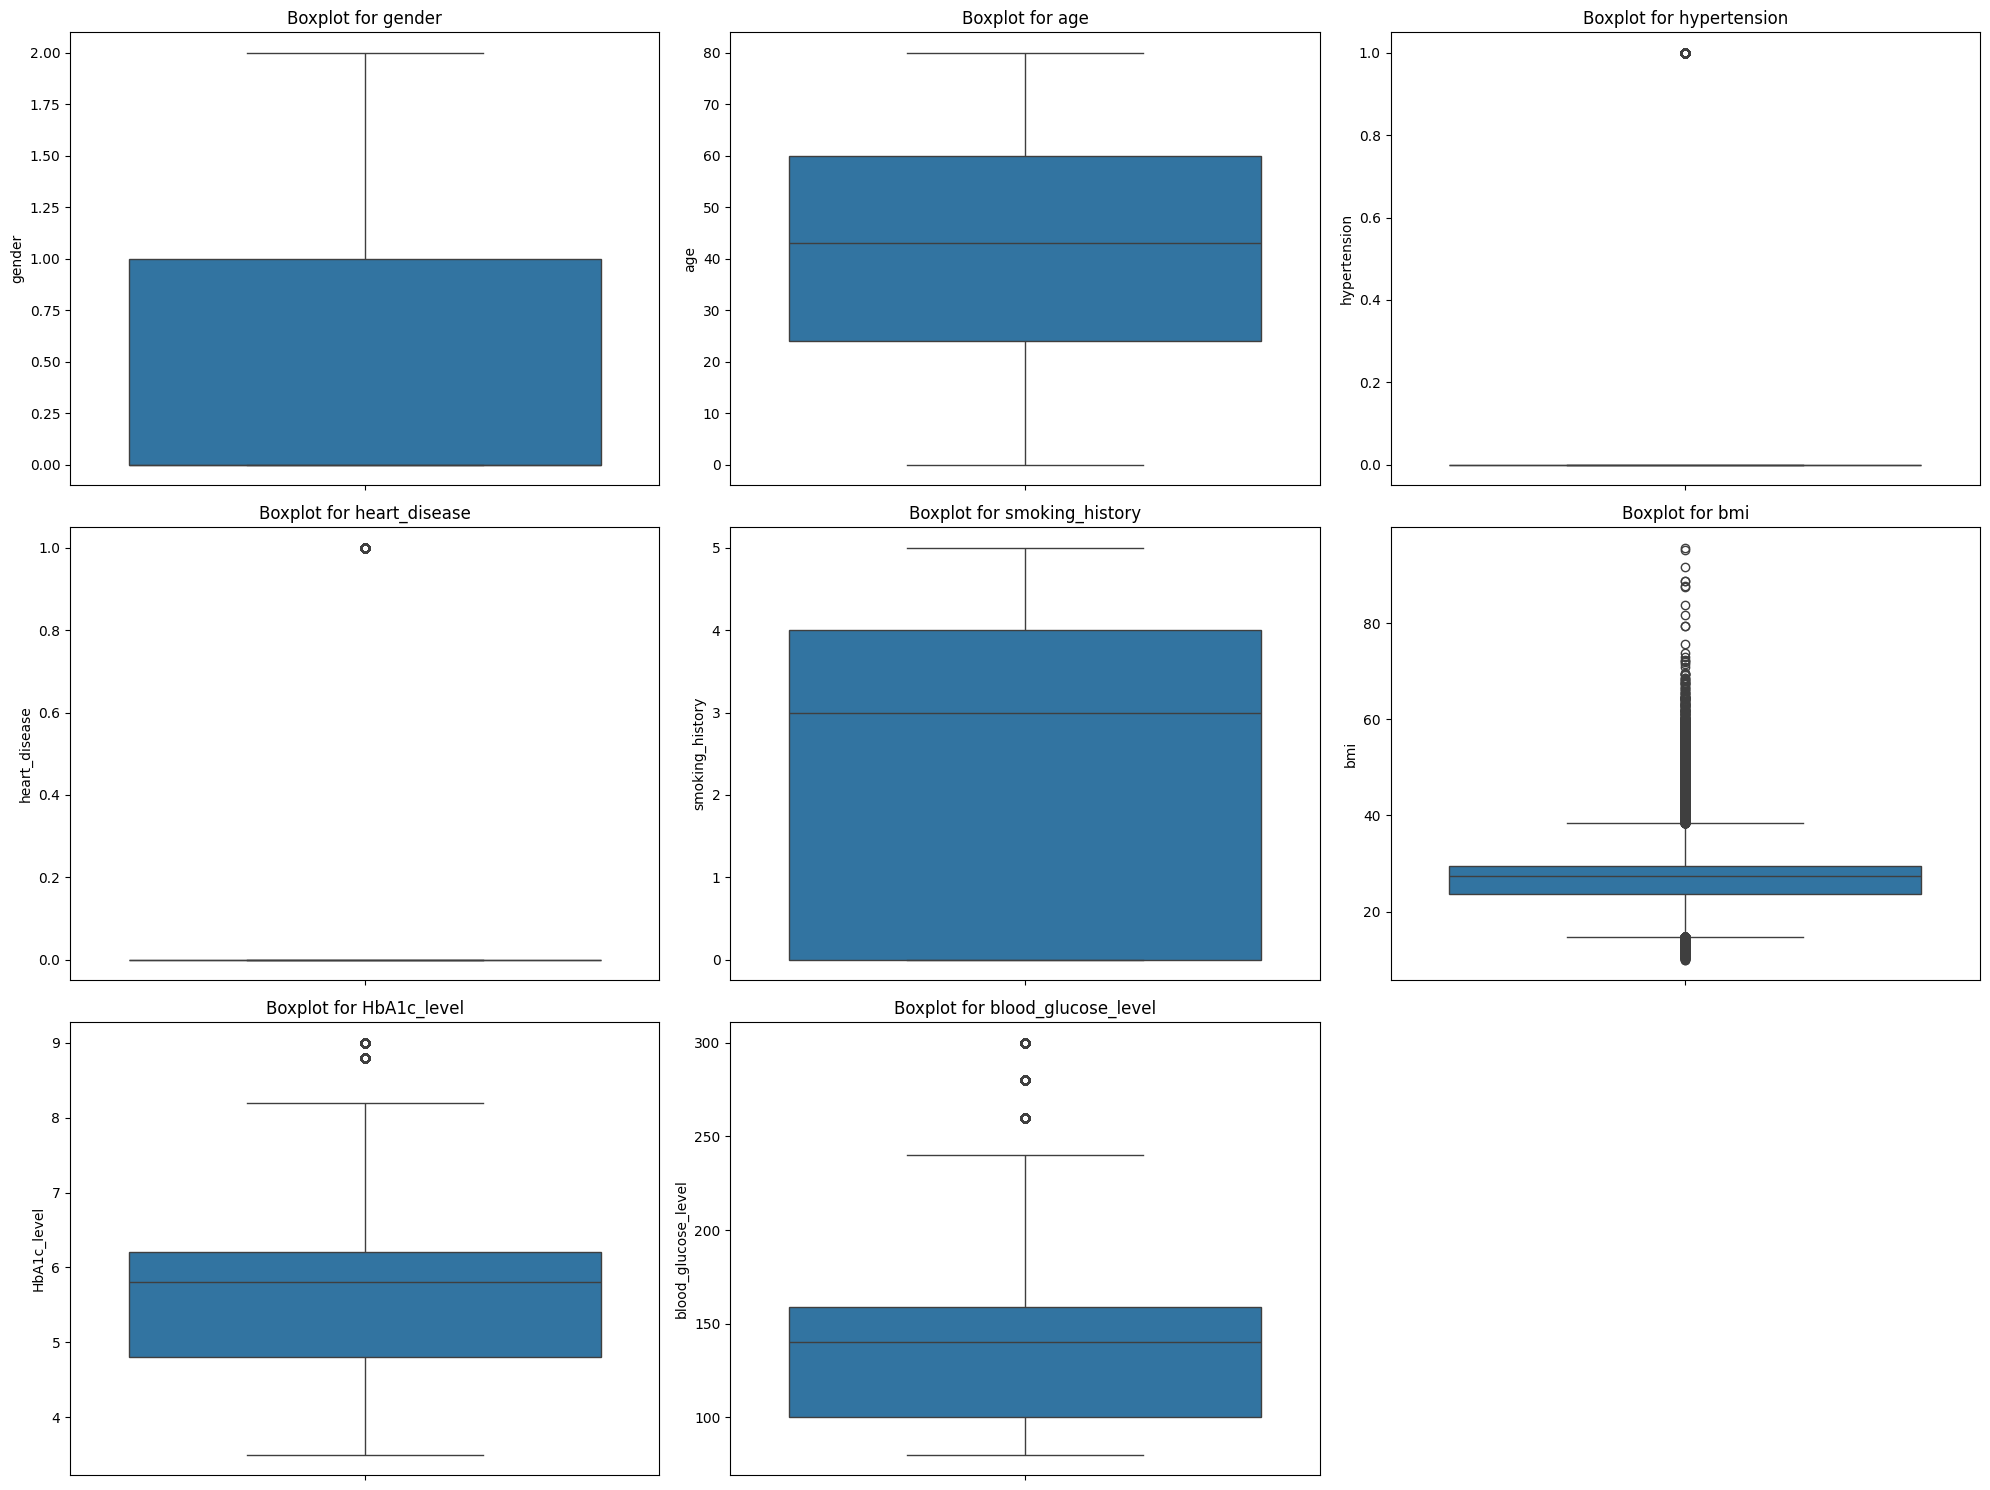

In [25]:
# visualizations outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15)) # This line creates a new figure for the plots and sets its size to 20 inches wide by 15 inches tall. This helps ensure the individual plots are large enough to be readable.
for i, col in enumerate(X.columns): # This loop iterates through each column name in your features DataFrame X, keeping track of both the index (i) and the column name (col).
    plt.subplot(3, 3, i+1) # This line creates a grid of subplots within the figure. 3, 3 specifies a 3x3 grid (9 plots in total). i+1 specifies the current position of the subplot in the grid (starting from 1).
    sns.boxplot(X[col]) # This is the core plotting command. It uses seaborn to create a box plot for the data in the current column X[col].
    plt.title(f'Boxplot for {col}') # This sets the title for the current subplot to indicate which feature it represents.
    plt.tight_layout() # This function automatically adjusts the subplot parameters to give a tight layout, preventing labels and titles from overlapping.
plt.show()

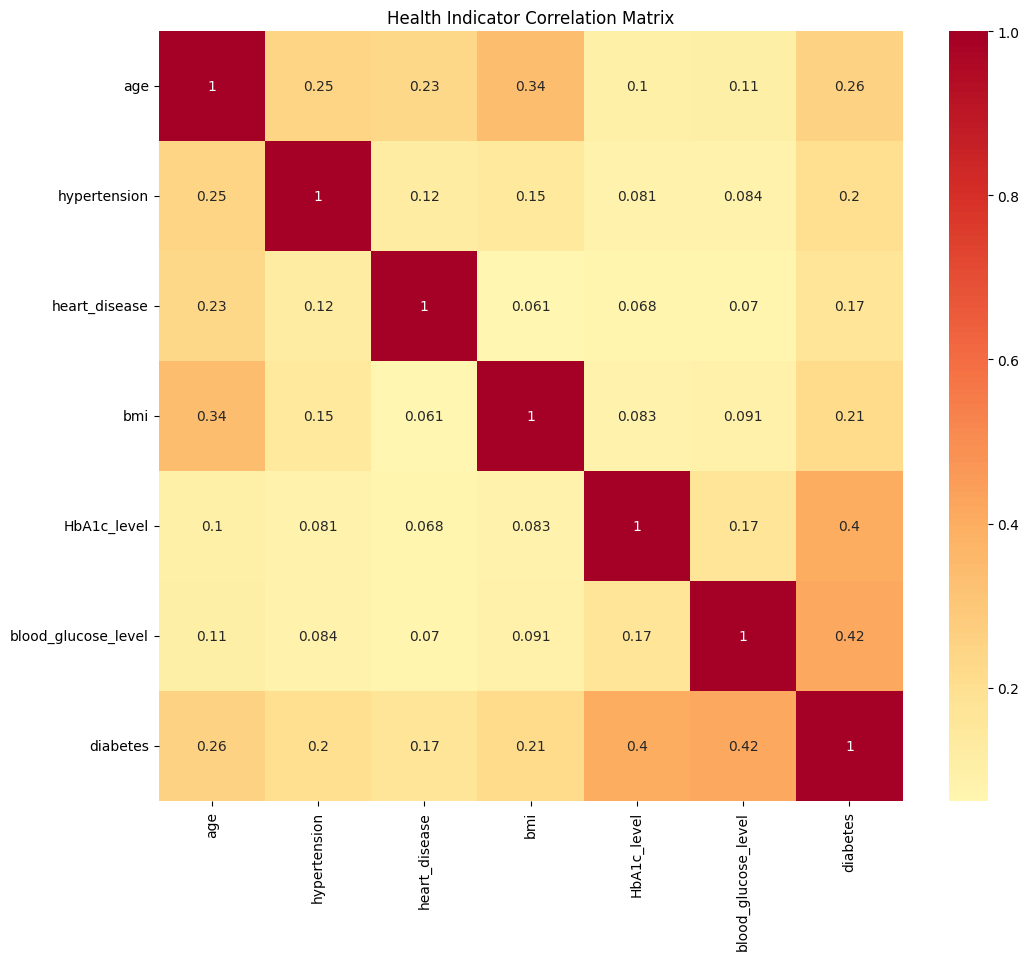

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0)
plt.title('Health Indicator Correlation Matrix')
plt.show()

In [38]:
# build our model using Decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [39]:
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

In [40]:
# Define Hyperparameters for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [3, 5, 10, None],     # Depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for best split
}


In [41]:

# perform grid search
# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [42]:
# train model in best params
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
# Evaluate model
# Predictions
y_pred = best_dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97252
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     22875
           1       1.00      0.68      0.81      2125

    accuracy                           0.97     25000
   macro avg       0.99      0.84      0.90     25000
weighted avg       0.97      0.97      0.97     25000



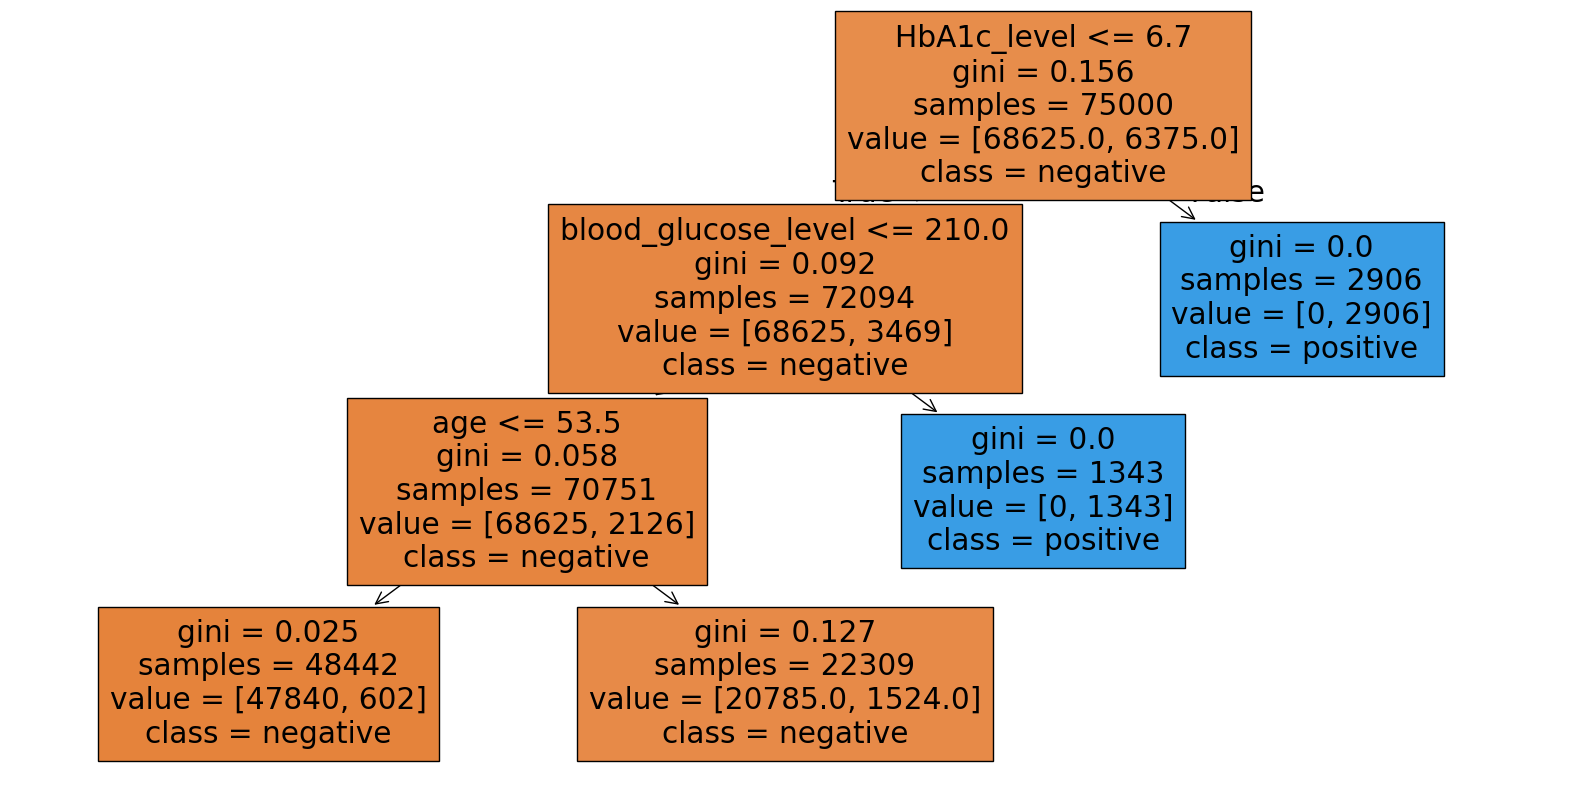

In [44]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=['negative', 'positive'], filled=True)
plt.show()


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [10]:
# Train Decision Tree with Gini Criterion (Primary Implementation)
dt_gini = DecisionTreeClassifier(
    criterion="gini",      # Gini impurity measure
    random_state=42,       # Reproducible results
    max_depth=10,          # Prevent overfitting
    min_samples_leaf=10    # Minimum samples in leaf nodes
)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [11]:
# Compare with other criteria
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=10, min_samples_leaf=10)
dt_log_loss = DecisionTreeClassifier(criterion="log_loss", random_state=42, max_depth=10, min_samples_leaf=10)

In [12]:
dt_entropy.fit(X_train, y_train)
dt_log_loss.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=10,
                       random_state=42)

In [13]:
# Make predictions with all models
gini_pred = dt_gini.predict(X_test)
entropy_pred = dt_entropy.predict(X_test)
log_loss_pred = dt_log_loss.predict(X_test)

In [14]:
# Evaluate models
print("🎯 Gini Criterion Results:")
print(f"   Accuracy: {accuracy_score(y_test, gini_pred):.4f}")
print("📊 Entropy Criterion Results:")
print(f"   Accuracy: {accuracy_score(y_test, entropy_pred):.4f}")
print("🔥 Log Loss Criterion Results:")
print(f"   Accuracy: {accuracy_score(y_test, log_loss_pred):.4f}")

🎯 Gini Criterion Results:
   Accuracy: 0.9721
📊 Entropy Criterion Results:
   Accuracy: 0.9717
🔥 Log Loss Criterion Results:
   Accuracy: 0.9717


/tmp/ipython-input-4050224701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes', palette='viridis')


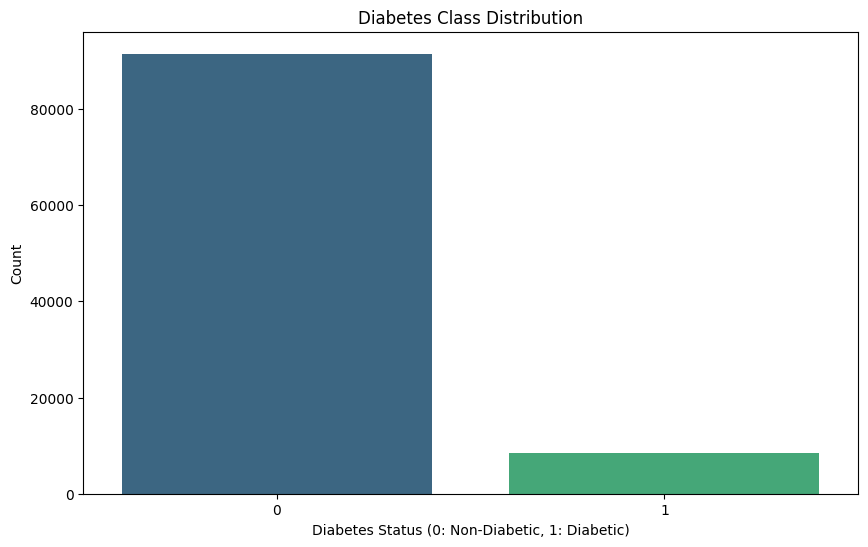

In [20]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diabetes', palette='viridis')
plt.title('Diabetes Class Distribution')
plt.xlabel('Diabetes Status (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()